In [23]:
from deap import tools, base
from multiprocessing import Pool
# from ga_scheme import eaMuPlusLambda
from deap.algorithms import eaMuPlusLambda
from numpy import random as rnd
import numpy as np
from deap import creator
from deap import benchmarks

creator.create("BaseFitness", base.Fitness, weights=(1.0,))
creator.create("Individual", np.ndarray, fitness=creator.BaseFitness)

c:\Users\vando\AppData\Local\Programs\Python\Python39\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'BaseFitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\vando\AppData\Local\Programs\Python\Python39\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [53]:



def mutation(individual):
    n = len(individual)
    for i in range(n):
        if rnd.random() < n * 0.15:
            individual[i] += rnd.normal(0.0, 0.2)
            individual[i] = np.clip(individual[i], -5, 5)
    return individual,


class SimpleGAExperiment:
    def factory(self):
        return rnd.random(self.dimension) * 10 - 5

    def __init__(self, function, dimension, pop_size, iterations):
        self.pop_size = pop_size
        self.iterations = iterations
        self.mut_prob = 0.6
        self.cross_prob = 0.3

        self.function = function
        self.dimension = dimension

        # self.pool = Pool(5)
        self.engine = base.Toolbox()
        # self.engine.register("map", self.pool.map)
        self.engine.register("map", map)
        self.engine.register("individual", tools.initIterate, creator.Individual, self.factory)
        self.engine.register("population", tools.initRepeat, list, self.engine.individual, self.pop_size)
        self.engine.register("mate", tools.cxOnePoint)
        self.engine.register("mutate", tools.mutGaussian, mu=0, sigma=0.9, indpb=0.05)
        # self.engine.register("mutate", tools.mutFlipBit, indpb=0.2)
        # self.engine.register("mutate", mutation)
        self.engine.register("select", tools.selTournament, tournsize=30)
        # self.engine.register("select", tools.selRoulette)
        self.engine.register("evaluate", self.function)


    def run(self):
        pop = self.engine.population()
        hof = tools.HallOfFame(3, np.array_equal)
        stats = tools.Statistics(lambda ind: ind.fitness.values[0])
        stats.register("avg", np.mean)
        stats.register("std", np.std)
        stats.register("min", np.min)
        stats.register("max", np.max)

        pop, log = eaMuPlusLambda(pop, self.engine, mu=self.pop_size, lambda_=int(self.pop_size*0.8), cxpb=self.cross_prob, mutpb=self.mut_prob,
                                  ngen=self.iterations,
                                  stats=stats, halloffame=hof, verbose=True)
        print("Best = {}".format(hof[0]))
        print("Best fit = {}".format(hof[0].fitness.values[0]))
        return log


gen	nevals	avg    	std     	min   	max    
0  	100   	3.89557	0.177855	3.4221	4.21653
1  	68    	4.20095	0.0625834	4.10134	4.32728
2  	78    	4.33926	0.029379 	4.22903	4.39062
3  	71    	4.39751	0.00734737	4.39062	4.40965
4  	76    	4.45951	0.0192924 	4.40965	4.48538
5  	68    	4.50523	0.0104769 	4.47832	4.51955
6  	71    	4.55384	0.0290931 	4.51955	4.60618
7  	74    	4.61251	0.00806317	4.58   	4.62249
8  	76    	4.65066	0.0161087 	4.62249	4.67063
9  	75    	4.69548	0.0212115 	4.67063	4.73563
10 	74    	4.74195	0.0084326 	4.7126 	4.75414
11 	73    	4.78578	0.0224364 	4.75414	4.81707
12 	76    	4.8335 	0.0210014 	4.81559	4.87129
13 	76    	4.88453	0.0122609 	4.85925	4.90625
14 	71    	4.92824	0.0134838 	4.90625	4.94901
15 	69    	4.98168	0.0242232 	4.94901	5.01596
16 	75    	5.04041	0.0192063 	5.01065	5.07583
17 	71    	5.09058	0.0170388 	5.0507 	5.12264
18 	72    	5.13301	0.0157813 	5.10603	5.16628
19 	75    	5.17211	0.0102766 	5.14261	5.18685
20 	75    	5.20008	0.0167163 	5.18685	5.24

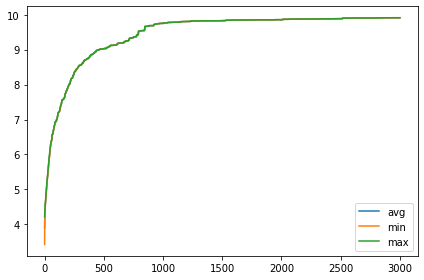

In [56]:

from functions import rastrigin
if __name__ == "__main__":

    def function(x):
        res = rastrigin(x)
        return res,
    dimension = 100 # set to 100
    pop_size = 100 # max is 100
    iterations = 3000 # max is 10000
    scenario = SimpleGAExperiment(function, dimension, pop_size, iterations)
    log = scenario.run()
    from draw_log import draw_log
    draw_log(log)
